# **Market & Industry Analysis**

using 30 Industry Portfolio data from Ken French Data Library

## Capitalization
1. market cap by industry and total market => how the stock market grows over time
2. industry cap-weight. change in cap-weight over time => how the importance (weight) of each industry changes over time

## Return
1. market and industry
2. Histogram and summary stats (min, max, 1st quar, 3rd quar, median/mean, stdev, n)

## Other ideas:
* Covariance of representative pairs of stocks (different industries, for eg)
* Correlation between monthly/yearly return of different industries
* Cap-weighted Index and trailing returns

In [8]:
import pandas as pd
import numpy as np
import kit as kit
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%load_ext autoreload
%autoreload 2
%matplotlib inline

img_fpath = '../../docs/assets/img/'

ind_rets = kit.get_csv('ind30_rets')/100
ind_nfirms = kit.get_csv('ind30_nfirms',skiprows=1)
ind_size = kit.get_csv('ind30_size',skiprows=1)

# industry list: ['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
#       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
#       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
#       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Market Cap

In [2]:
# market cap by industry
ind_mktcap = ind_nfirms * ind_size

# total market cap
total_mktcap = ind_mktcap.sum(axis='columns')

# cap-weight by industry: how much each industry weights in a given month
ind_capweight = ind_mktcap.divide(total_mktcap,axis='rows')

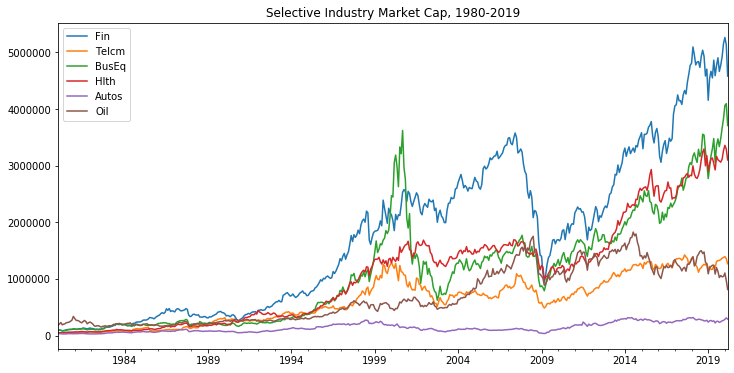

In [15]:
l = ['Fin','Telcm','BusEq','Hlth','Autos','Oil']
ax = ind_mktcap['1980':][l].plot(figsize=(12,6)) # how much market cap of each industry rises over time

ax.legend()
ax.set_title('Selective Industry Market Cap, 1980-2019')
plt.savefig(img_fpath+'pf_1.png')
plt.show()

In [ ]:
ax = ind_capweight['1980':][l].plot(figsize=(12,6),legend=True)

### Return

In [5]:
# total market return in a given month = sum off returns in dollars = sum of (cap-weight * industry return) 
mkt_ret = (ind_capweight*ind_rets).sum(axis='columns')

In [6]:
mkt_ret

1926-07    0.031375
1926-08    0.028953
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2019-11    0.039315
2019-12    0.028789
2020-01   -0.000924
2020-02   -0.080846
2020-03   -0.132392
Freq: M, Length: 1125, dtype: float64

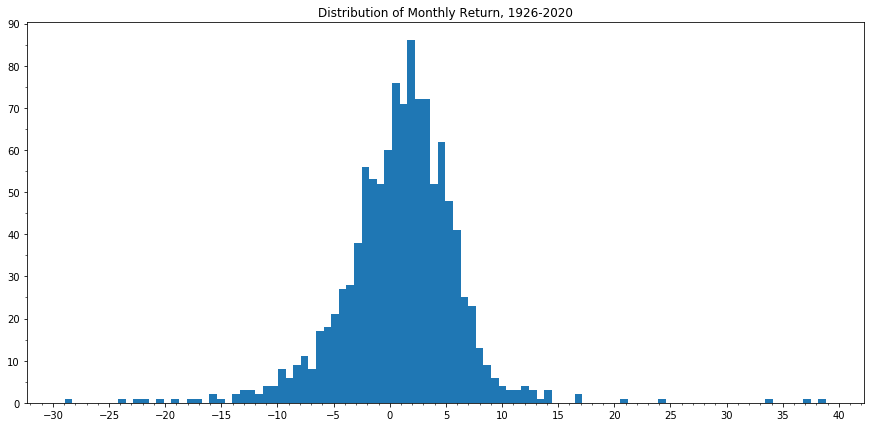

In [11]:
# histogram of monthly market returns

fig, ax = plt.subplots(figsize=(15,7))
plt.hist(mkt_ret*100,bins=100)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.title('Distribution of Monthly Return, 1926-2020')
plt.savefig(img_fpath+'pf_2.png')
plt.show()

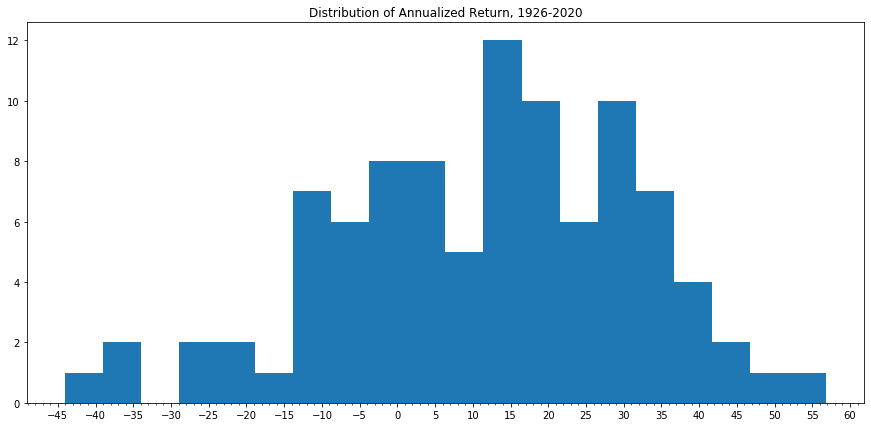

In [13]:
# histogram of annualized market returns

y = np.arange(1926,2021,1)
mra = pd.Series(index=list(y), dtype='float') # mra is short for market_return_annualized

for i in range(len(y)):
    mra[y[i]] = (1+mkt_ret[str(y[i])]).prod()-1

fig, ax = plt.subplots(figsize=(15,7))
plt.hist(mra.values*100,bins=20)

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

#ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
#ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

plt.title('Distribution of Annualized Return, 1926-2020')
plt.show()

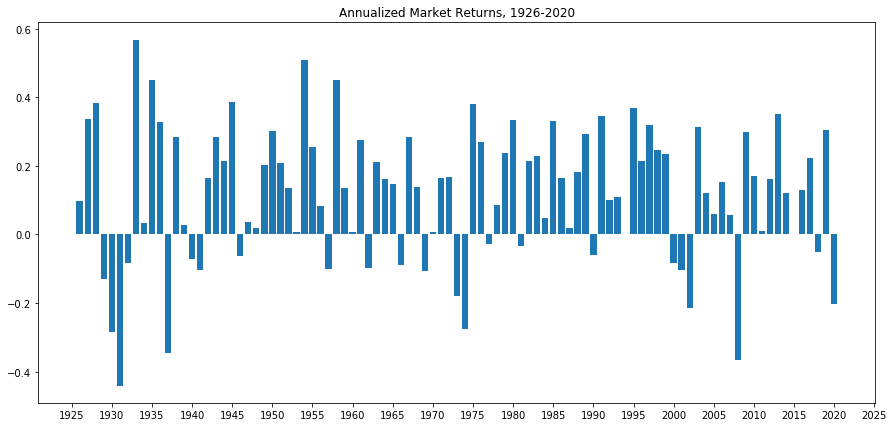

In [14]:
plt.figure(figsize=(15,7))
plt.bar(mra.index, mra.values)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.title('Annualized Market Returns, 1926-2020')
plt.savefig(img_fpath+'pf_3.png')
plt.show()

### example of creating a DataFrame
```
s1 = list(np.arange(11,16,1))
s2 = np.random.normal(0,1,len(s1))
s = pd.DataFrame(s2, columns=['ret'], index=s1)
```

In [150]:
total_mkt_ret

1926-07    0.031375
1926-08    0.028953
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2019-11    0.039315
2019-12    0.028789
2020-01   -0.000924
2020-02   -0.080846
2020-03   -0.132392
Freq: M, Length: 1125, dtype: float64

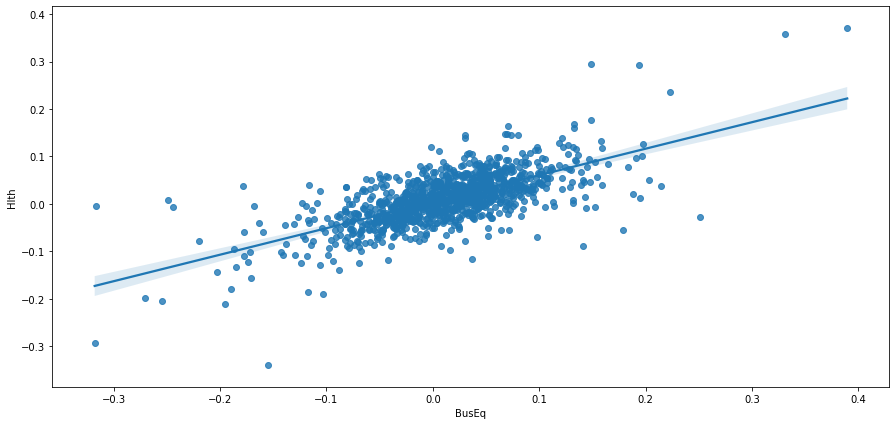

In [187]:
# scatterplot for correlation between any two industries

ind_l = ['BusEq','Hlth']
ind_r = ind_rets[ind_l]

plt.figure(figsize=(15,7))

sns.regplot(ind_r['BusEq'],ind_r['Hlth'])

plt.show()

In [124]:
total_mkt_index = kit.drawdown(total_mkt_ret).Wealth
total_mkt_index

1926-07    1.031375e+03
1926-08    1.061236e+03
1926-09    1.067143e+03
1926-10    1.036725e+03
1926-11    1.065794e+03
               ...     
2019-11    8.488945e+06
2019-12    8.733331e+06
2020-01    8.725264e+06
2020-02    8.019857e+06
2020-03    6.958089e+06
Freq: M, Name: Wealth, Length: 1125, dtype: float64

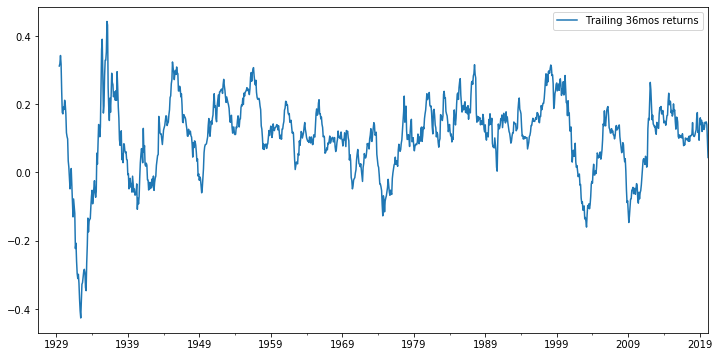

In [125]:
# trailing 36mo return 
tmi_tr36mrets = total_mkt_ret.rolling(window=36).agg(kit.annualized_rets, periods_per_year=12)
tmi_tr36mrets.plot(figsize=(12,6),label='Trailing 36mos returns',legend=True)

# Rolling Correlation

In [127]:
ts_corr = ind_rets.rolling(window=36).corr()

In [134]:
ts_corr.index.names = ['date', 'industry']

In [136]:
ind_tr36mcorr = ts_corr.groupby('date').apply(lambda cormat: cormat.values.mean())

In [137]:
ind_tr36mcorr

date
1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
             ...   
2019-11    0.561739
2019-12    0.563145
2020-01    0.558416
2020-02    0.596345
2020-03    0.673701
Freq: M, Length: 1125, dtype: float64

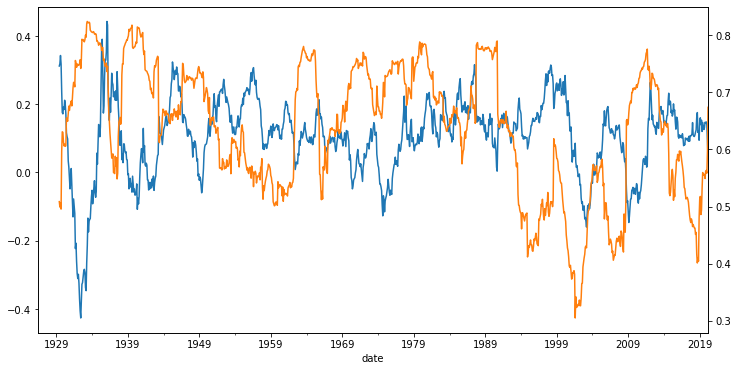

In [142]:
tmi_tr36mrets.plot(figsize=(12,6))
ind_tr36mcorr.plot(secondary_y=True)